<a href="https://colab.research.google.com/github/maflorbaudino/Master/blob/main/Final_Updated_Probabilistic_Topics_Visualization_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install --upgrade -q gspread
!pip install dash dash-table
!pip install jupyter-datatables

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import numpy as np

import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

import pandas as pd


# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
dataset = pd.read_csv('prueba.csv', header= 0, encoding= 'unicode_escape')

dataset.head()

,English name,Country,Start date,Objective(s)
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,To execute actions tending to incorporate the ethical dimension in the institutions of science a...
1,IBM WATSON AI PILOT,Argentina,2018.0,To test the AI technology in the Aquaculture sector.
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,"To develop an appropriate governance framework to foster multisectoral dialogue, through the cre..."
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,"On AI specifically, E-Digital includes action to evaluate potential economic and social impact ..."
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,To monitor and evaluate the impacts of AI systems in order to ensure that they achieve the expec...


In [ ]:
# from sklearn.feature_extraction import text
# my_additional_stop_words = ['xxx','yyy']
# my_stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# list of texts
documents = dataset['Objective(s)'].tolist()

# bag-of-words
tf_vectorizer = CountVectorizer(
    stop_words='english',
    min_df=1,
    max_df=0.3,
    lowercase=True,
    max_features=50000,
    token_pattern='[a-zA-Z0-9]{3,}',
    analyzer = 'word'
)
bag_of_words = tf_vectorizer.fit_transform(documents)
dictionary = tf_vectorizer.get_feature_names_out()
vocabulary = tf_vectorizer.vocabulary_

print("Vocabulary Size: ", len(dictionary))

Vocabulary Size:  1098


In [ ]:
s = bag_of_words.toarray().sum(axis=0)
st = sorted(range(len(s)), key=lambda k: s[k], reverse=True)
for i,x in enumerate(st[:20]):
  print(dictionary[x],s[x])

digital 47
innovation 35
implementation 28
use 28
systems 26
private 25
technologies 25
country 23
technological 22
entities 21
ethical 21
projects 20
scientific 20
develop 19
intelligence 19
knowledge 19
research 19
technology 19
artificial 18
government 18


# Topic Modeling

In [ ]:
topics = 5

alpha = 0.1

beta = 0.05

# Run LDA
lda = LatentDirichletAllocation(
    n_components=topics,
    doc_topic_prior=alpha,
    topic_word_prior=beta,
    max_iter=25,
    learning_method='online',
    evaluate_every=1,
    n_jobs = -1,
    random_state=0,
    verbose=1)
lda.fit(bag_of_words)

iteration: 1 of max_iter: 25, perplexity: 22826.8048
iteration: 2 of max_iter: 25, perplexity: 15899.1710
iteration: 3 of max_iter: 25, perplexity: 12144.2906
iteration: 4 of max_iter: 25, perplexity: 9739.9901
iteration: 5 of max_iter: 25, perplexity: 8066.4267
iteration: 6 of max_iter: 25, perplexity: 6841.0365
iteration: 7 of max_iter: 25, perplexity: 5905.9121
iteration: 8 of max_iter: 25, perplexity: 5175.9453
iteration: 9 of max_iter: 25, perplexity: 4595.1015
iteration: 10 of max_iter: 25, perplexity: 4125.9028
iteration: 11 of max_iter: 25, perplexity: 3742.2617
iteration: 12 of max_iter: 25, perplexity: 3425.4196
iteration: 13 of max_iter: 25, perplexity: 3161.5314
iteration: 14 of max_iter: 25, perplexity: 2940.1618
iteration: 15 of max_iter: 25, perplexity: 2753.3073
iteration: 16 of max_iter: 25, perplexity: 2594.7381
iteration: 17 of max_iter: 25, perplexity: 2459.5425
iteration: 18 of max_iter: 25, perplexity: 2343.8034
iteration: 19 of max_iter: 25, perplexity: 2244.3654

LatentDirichletAllocation(doc_topic_prior=0.1, evaluate_every=1,
                          learning_method='online', max_iter=25, n_components=5,
                          n_jobs=-1, random_state=0, topic_word_prior=0.05,
                          verbose=1)

In [ ]:
no_top_words = 10
no_top_documents = 2

doc_topics = lda.transform(bag_of_words)
topics = lda.components_

print("LDA Topics")
for topic_idx, topic in enumerate(topics):
    print("-"*30)
    print(" Topic ",(topic_idx)," :")
    print("["," | ".join([dictionary[i]
                    for i in topic.argsort()[:-no_top_words - 1:-1]]),"]")
    top_doc_indices = np.argsort( doc_topics[:,topic_idx] )[::-1][0:no_top_documents]
    for doc_index in top_doc_indices:
        row_index = doc_index +1
        print("[",doc_index,"] (",dataset.loc[row_index][0],") \'",dataset.loc[row_index][0],"\'", [ "{0:.5f}".format(weight) for weight in doc_topics[doc_index]])


LDA Topics
------------------------------
 Topic  0  :
[ ethical | innovation | implementation | scientific | research | private | systems | colombia | country | principles ]
[ 57 ] ( AI USE CASES IN THE PUBLIC SECTOR ) ' AI USE CASES IN THE PUBLIC SECTOR ' ['0.99736', '0.00066', '0.00066', '0.00066', '0.00066']
[ 28 ] ( APPLIED RESEARCH CENTRES IN AI ) ' APPLIED RESEARCH CENTRES IN AI ' ['0.99638', '0.00091', '0.00091', '0.00091', '0.00091']
------------------------------
 Topic  1  :
[ intelligence | digital | country | artificial | projects | colombian | academic | personal | research | information ]
[ 69 ] ( AI.GOV WEBSITE ) ' AI.GOV WEBSITE ' ['0.00102', '0.99594', '0.00102', '0.00102', '0.00102']
[ 40 ] ( CHECK YOUR PLAN-TELECOMMUNICATION SERVICES PRICE COMPARISON TOOL ) ' CHECK YOUR PLAN-TELECOMMUNICATION SERVICES PRICE COMPARISON TOOL ' ['0.00148', '0.99407', '0.00148', '0.00148', '0.00148']
------------------------------
 Topic  2  :
[ digital | use | systems | technologies | 

In [ ]:
from IPython.display import display, HTML
import pandas as pd
#pd.set_option('display.max_columns', None)

topicnames = ["topic"+ str(x) for x in range(0, lda.n_components)]
norm_doc_topics = []
for i in doc_topics:
  norm_doc_topics.append([ "{0:.3f}".format(weight) for weight in i])

df = pd.DataFrame(norm_doc_topics,
                  columns=topicnames,
                  index=dataset['English name'].tolist())
num_rows_per_page=10
df


,topic0,topic1,topic2,topic3,topic4
NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,0.994,0.002,0.002,0.002,0.002
IBM WATSON AI PILOT,0.029,0.029,0.886,0.029,0.029
TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,0.002,0.002,0.002,0.002,0.991
BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,0.004,0.986,0.004,0.004,0.004
PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL INTELLIGENCE IN THE FEDERAL PUBLIC ADMINISTRATION,0.002,0.002,0.992,0.002,0.002
...,...,...,...,...,...
JAQUE AND SERVICES GUIDE,0.947,0.013,0.013,0.013,0.013
NATIONAL AI RESEARCH CENTER,0.984,0.004,0.004,0.004,0.004
GOVERNANCE COMMITTEE OF THE BRAZILIAN AI STRATEGY,0.001,0.001,0.001,0.001,0.995
MCTI/EMBRAPII NETWORK OF TECHNOLOGIES AND DIGITAL INNOVATION,0.007,0.007,0.972,0.007,0.007


In [ ]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis])

# Assign Column and Index
df_topic_keywords.columns = dictionary
df_topic_keywords.index = topicnames

# View
df_topic_keywords
#df_topic_keywords.head()

,000,2019,2022,2030,4ir,able,academia,academic,academics,accelerate,...,volume,water,way,ways,wireline,work,workshops,world,writing,wrong
topic0,0.000083,0.000077,0.000083,0.000865,0.001663,0.000870,0.000871,0.000076,0.000870,0.000851,...,0.000871,0.000873,0.000072,0.000071,0.000077,0.000089,0.000076,0.000867,0.000859,0.000071
topic1,0.000168,0.000181,0.000180,0.000187,0.000194,0.000202,0.000184,0.010192,0.000188,0.002202,...,0.000179,0.000174,0.000197,0.000182,0.000201,0.000188,0.000196,0.000186,0.000181,0.000181
topic2,0.001284,0.001293,0.001292,0.000110,0.000109,0.000107,0.000105,0.000105,0.000102,0.001293,...,0.000113,0.000106,0.000110,0.000108,0.000107,0.001293,0.000124,0.001296,0.000111,0.001290
topic3,0.000341,0.000351,0.004128,0.000351,0.000342,0.000353,0.000358,0.000352,0.000372,0.004239,...,0.000352,0.000351,0.000370,0.000363,0.000347,0.000358,0.000357,0.000326,0.000384,0.000354
topic4,0.000129,0.000134,0.000141,0.000129,0.000128,0.000137,0.001595,0.003048,0.000122,0.000135,...,0.000140,0.000136,0.001601,0.001593,0.001578,0.003025,0.001568,0.000147,0.000148,0.000139


In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda.score(bag_of_words))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda.perplexity(bag_of_words))

# See model parameters
print(lda)

Log Likelihood:  -22946.583701573207
Perplexity:  1873.9876558593692
LatentDirichletAllocation(doc_topic_prior=0.1, evaluate_every=1,
                          learning_method='online', max_iter=25, n_components=5,
                          n_jobs=-1, random_state=0, topic_word_prior=0.05,
                          verbose=1)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define Search Param
search_params = {'n_components': [5, 10, 15], 'doc_topic_prior': [.1, .3, .5], 'topic_word_prior': [.01, .03, .05]}

# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(bag_of_words)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 max_iter=5, random_state=0),
             param_grid={'doc_topic_prior': [0.1, 0.3, 0.5],
                         'n_components': [5, 10, 15],
                         'topic_word_prior': [0.01, 0.03, 0.05]})

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(bag_of_words))

Best Model's Params:  {'doc_topic_prior': 0.1, 'n_components': 5, 'topic_word_prior': 0.05}
Best Log Likelihood Score:  -12798.425571017773
Model Perplexity:  17343.052392555026


# Topic-based Document Similarity

In [ ]:
# Compute Jensen Shannon Divergence
from scipy.spatial import distance

similarities = []
for i1,d1 in enumerate(doc_topics[0:10]):
   for i2,d2 in enumerate(doc_topics[0:10]):
     sim_value = 1-distance.jensenshannon(d1, d2)
     norm_sim_value = "{0:.5f}".format(sim_value)
     similarities.append([dataset.loc[i1+1][0],dataset.loc[i2+1][0],norm_sim_value ])

sim_df = pd.DataFrame(similarities,
                  columns=['d1','d2','similarity'])

sim_df

,d1,d2,similarity
0,IBM WATSON AI PILOT,IBM WATSON AI PILOT,1.00000
1,IBM WATSON AI PILOT,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,0.21712
2,IBM WATSON AI PILOT,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,0.17816
3,IBM WATSON AI PILOT,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,0.18091
4,IBM WATSON AI PILOT,AI NATIONAL POLICY,0.17762
...,...,...,...
95,C4IR NETWORK,PROGRAM FOR THE DEVELOPMENT OF THE SOFTWARE INDUSTRY AND INNOVATION,0.17514
96,C4IR NETWORK,BIG DATA POLICY (DATA GOVERNANCE FRAMEWORK),0.18880
97,C4IR NETWORK,NATIONAL CHALLENGES,0.17894
98,C4IR NETWORK,APPLIED TECHNOLOGY CENTRES FOR URBAN EFFICIENCY,0.18268


In [ ]:
# Compute Jensen Shannon Divergence
from scipy.spatial import distance

similarities = []
for i1,d1 in enumerate(doc_topics[0:10]):
   for i2,d2 in enumerate(doc_topics[0:10]):
     sim_value = 1-distance.jensenshannon(d1, d2)
     norm_sim_value = "{0:.5f}".format(sim_value)
     similarities.append([dataset.loc[i1+1][0],dataset.loc[i2+1][0],norm_sim_value ])

sim_df = pd.DataFrame(similarities,
                  columns=['d1','d2','similarity'])

sim_df


,d1,d2,similarity
0,IBM WATSON AI PILOT,IBM WATSON AI PILOT,1.00000
1,IBM WATSON AI PILOT,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,0.21712
2,IBM WATSON AI PILOT,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,0.17816
3,IBM WATSON AI PILOT,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,0.18091
4,IBM WATSON AI PILOT,AI NATIONAL POLICY,0.17762
...,...,...,...
95,C4IR NETWORK,PROGRAM FOR THE DEVELOPMENT OF THE SOFTWARE INDUSTRY AND INNOVATION,0.17514
96,C4IR NETWORK,BIG DATA POLICY (DATA GOVERNANCE FRAMEWORK),0.18880
97,C4IR NETWORK,NATIONAL CHALLENGES,0.17894
98,C4IR NETWORK,APPLIED TECHNOLOGY CENTRES FOR URBAN EFFICIENCY,0.18268


# Topic Visualization

In [ ]:
!pip install topic-wizard
!pip install delayed

  Using cached pandas-1.5.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import topicwizard
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
topic_pipeline = Pipeline(
    [
        ("vectorizer", tf_vectorizer),
        ("topic_model", lda),
    ]
)
topic_pipeline.fit(documents)

Pipeline(steps=[('vectorizer',
                 CountVectorizer(max_df=0.3, max_features=50000,
                                 stop_words='english',
                                 token_pattern='[a-zA-Z0-9]{3,}')),
                ('topic_model',
                 LatentDirichletAllocation(learning_method='online',
                                           learning_offset=50.0, max_iter=5,
                                           random_state=0))])

In [ ]:
topicwizard.visualize(pipeline=topic_pipeline, corpus=documents)

Preprocessing


<IPython.core.display.Javascript object>

Open in browser:


<IPython.core.display.Javascript object>

<Thread(Thread-100 (_run_silent), stopped 140140578137664)>

## Analysis of 'Ethics' in Objectives

In [ ]:
dataset['Contains_Ethics'] = dataset['Objective(s)'].str.contains('ethics|ethic', case=False, na=False)
dataset.head()

,English name,Country,Start date,Objective(s),Contains_Ethics
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,To execute actions tending to incorporate the ethical dimension in the institutions of science a...,True
1,IBM WATSON AI PILOT,Argentina,2018.0,To test the AI technology in the Aquaculture sector.,False
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,"To develop an appropriate governance framework to foster multisectoral dialogue, through the cre...",False
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,"On AI specifically, E-Digital includes action to evaluate potential economic and social impact ...",False
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,To monitor and evaluate the impacts of AI systems in order to ensure that they achieve the expec...,False


## Visualization of 'Ethics' in Objectives

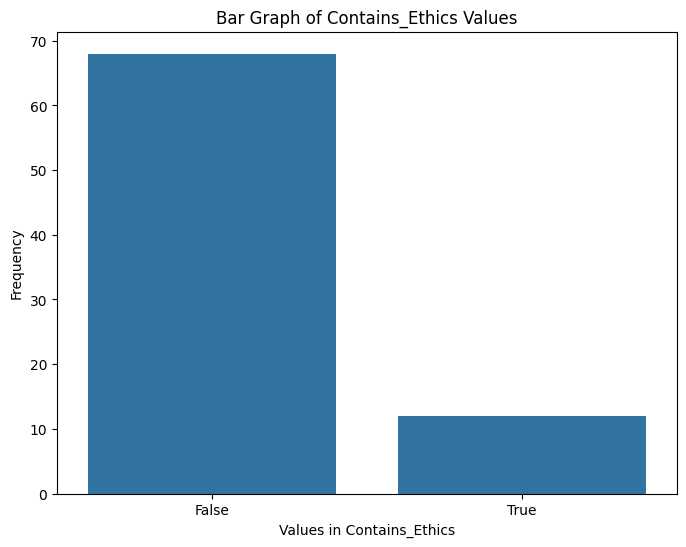

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
value_counts = dataset['Contains_Ethics'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.xlabel('Values in Contains_Ethics')
plt.ylabel('Frequency')
plt.title('Bar Graph of Contains_Ethics Values')
plt.show()

## Document Similarity Analysis

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(dataset['Objective(s)'].fillna(''))
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim, index=dataset['English name'], columns=dataset['English name'])
cosine_sim_df.head()

English name,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,IBM WATSON AI PILOT,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL INTELLIGENCE IN THE FEDERAL PUBLIC ADMINISTRATION,AI NATIONAL POLICY,PROGRAM FOR THE DEVELOPMENT OF THE SOFTWARE INDUSTRY AND INNOVATION,BIG DATA POLICY (DATA GOVERNANCE FRAMEWORK),NATIONAL CHALLENGES,APPLIED TECHNOLOGY CENTRES FOR URBAN EFFICIENCY,...,AI.GOV WEBSITE,CYBERSECURITY POLICY FOR AI DEPLOYMENT,4IR TECHNOLOGIES FOR AGRICULTURE (IN PROGRESS),CO-ORDINATION BODIES FOR AI POLICY IMPLEMENTATION,"BRAZILIAN AI BILL, N. 21/2020",JAQUE AND SERVICES GUIDE,NATIONAL AI RESEARCH CENTER,GOVERNANCE COMMITTEE OF THE BRAZILIAN AI STRATEGY,MCTI/EMBRAPII NETWORK OF TECHNOLOGIES AND DIGITAL INNOVATION,"NATIONAL NETWORK OF OPEN ACCESS DIGITAL REPOSITORIES OF SCIENCE, TECHNOLOGY AND INNOVATION"
English name,,,,,,,,,,,,,,,,,,,,,
NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,1.000000,0.073834,0.016922,0.024507,0.026247,0.109803,0.0,0.000000,0.044215,0.058493,...,0.055469,0.016753,0.014618,0.057219,0.054914,0.000000,0.110097,0.087903,0.038291,0.085458
IBM WATSON AI PILOT,0.073834,1.000000,0.000000,0.036232,0.042865,0.077528,0.0,0.000000,0.000000,0.041048,...,0.072815,0.058077,0.039670,0.025521,0.147309,0.000000,0.068920,0.014234,0.102282,0.082120
TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,0.016922,0.000000,1.000000,0.056530,0.025610,0.063071,0.0,0.036935,0.014468,0.044151,...,0.048307,0.096775,0.035128,0.075513,0.063135,0.047836,0.018756,0.070653,0.009082,0.057728
BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,0.024507,0.036232,0.056530,1.000000,0.101893,0.146162,0.0,0.086144,0.047972,0.029048,...,0.070534,0.079063,0.054144,0.147061,0.059754,0.000000,0.047378,0.058067,0.071721,0.019392
PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL INTELLIGENCE IN THE FEDERAL PUBLIC ADMINISTRATION,0.026247,0.042865,0.025610,0.101893,1.000000,0.159542,0.0,0.053214,0.000000,0.036924,...,0.062879,0.000000,0.015982,0.023619,0.100234,0.000000,0.020988,0.002513,0.084754,0.019882


## Document Similarity Visualization

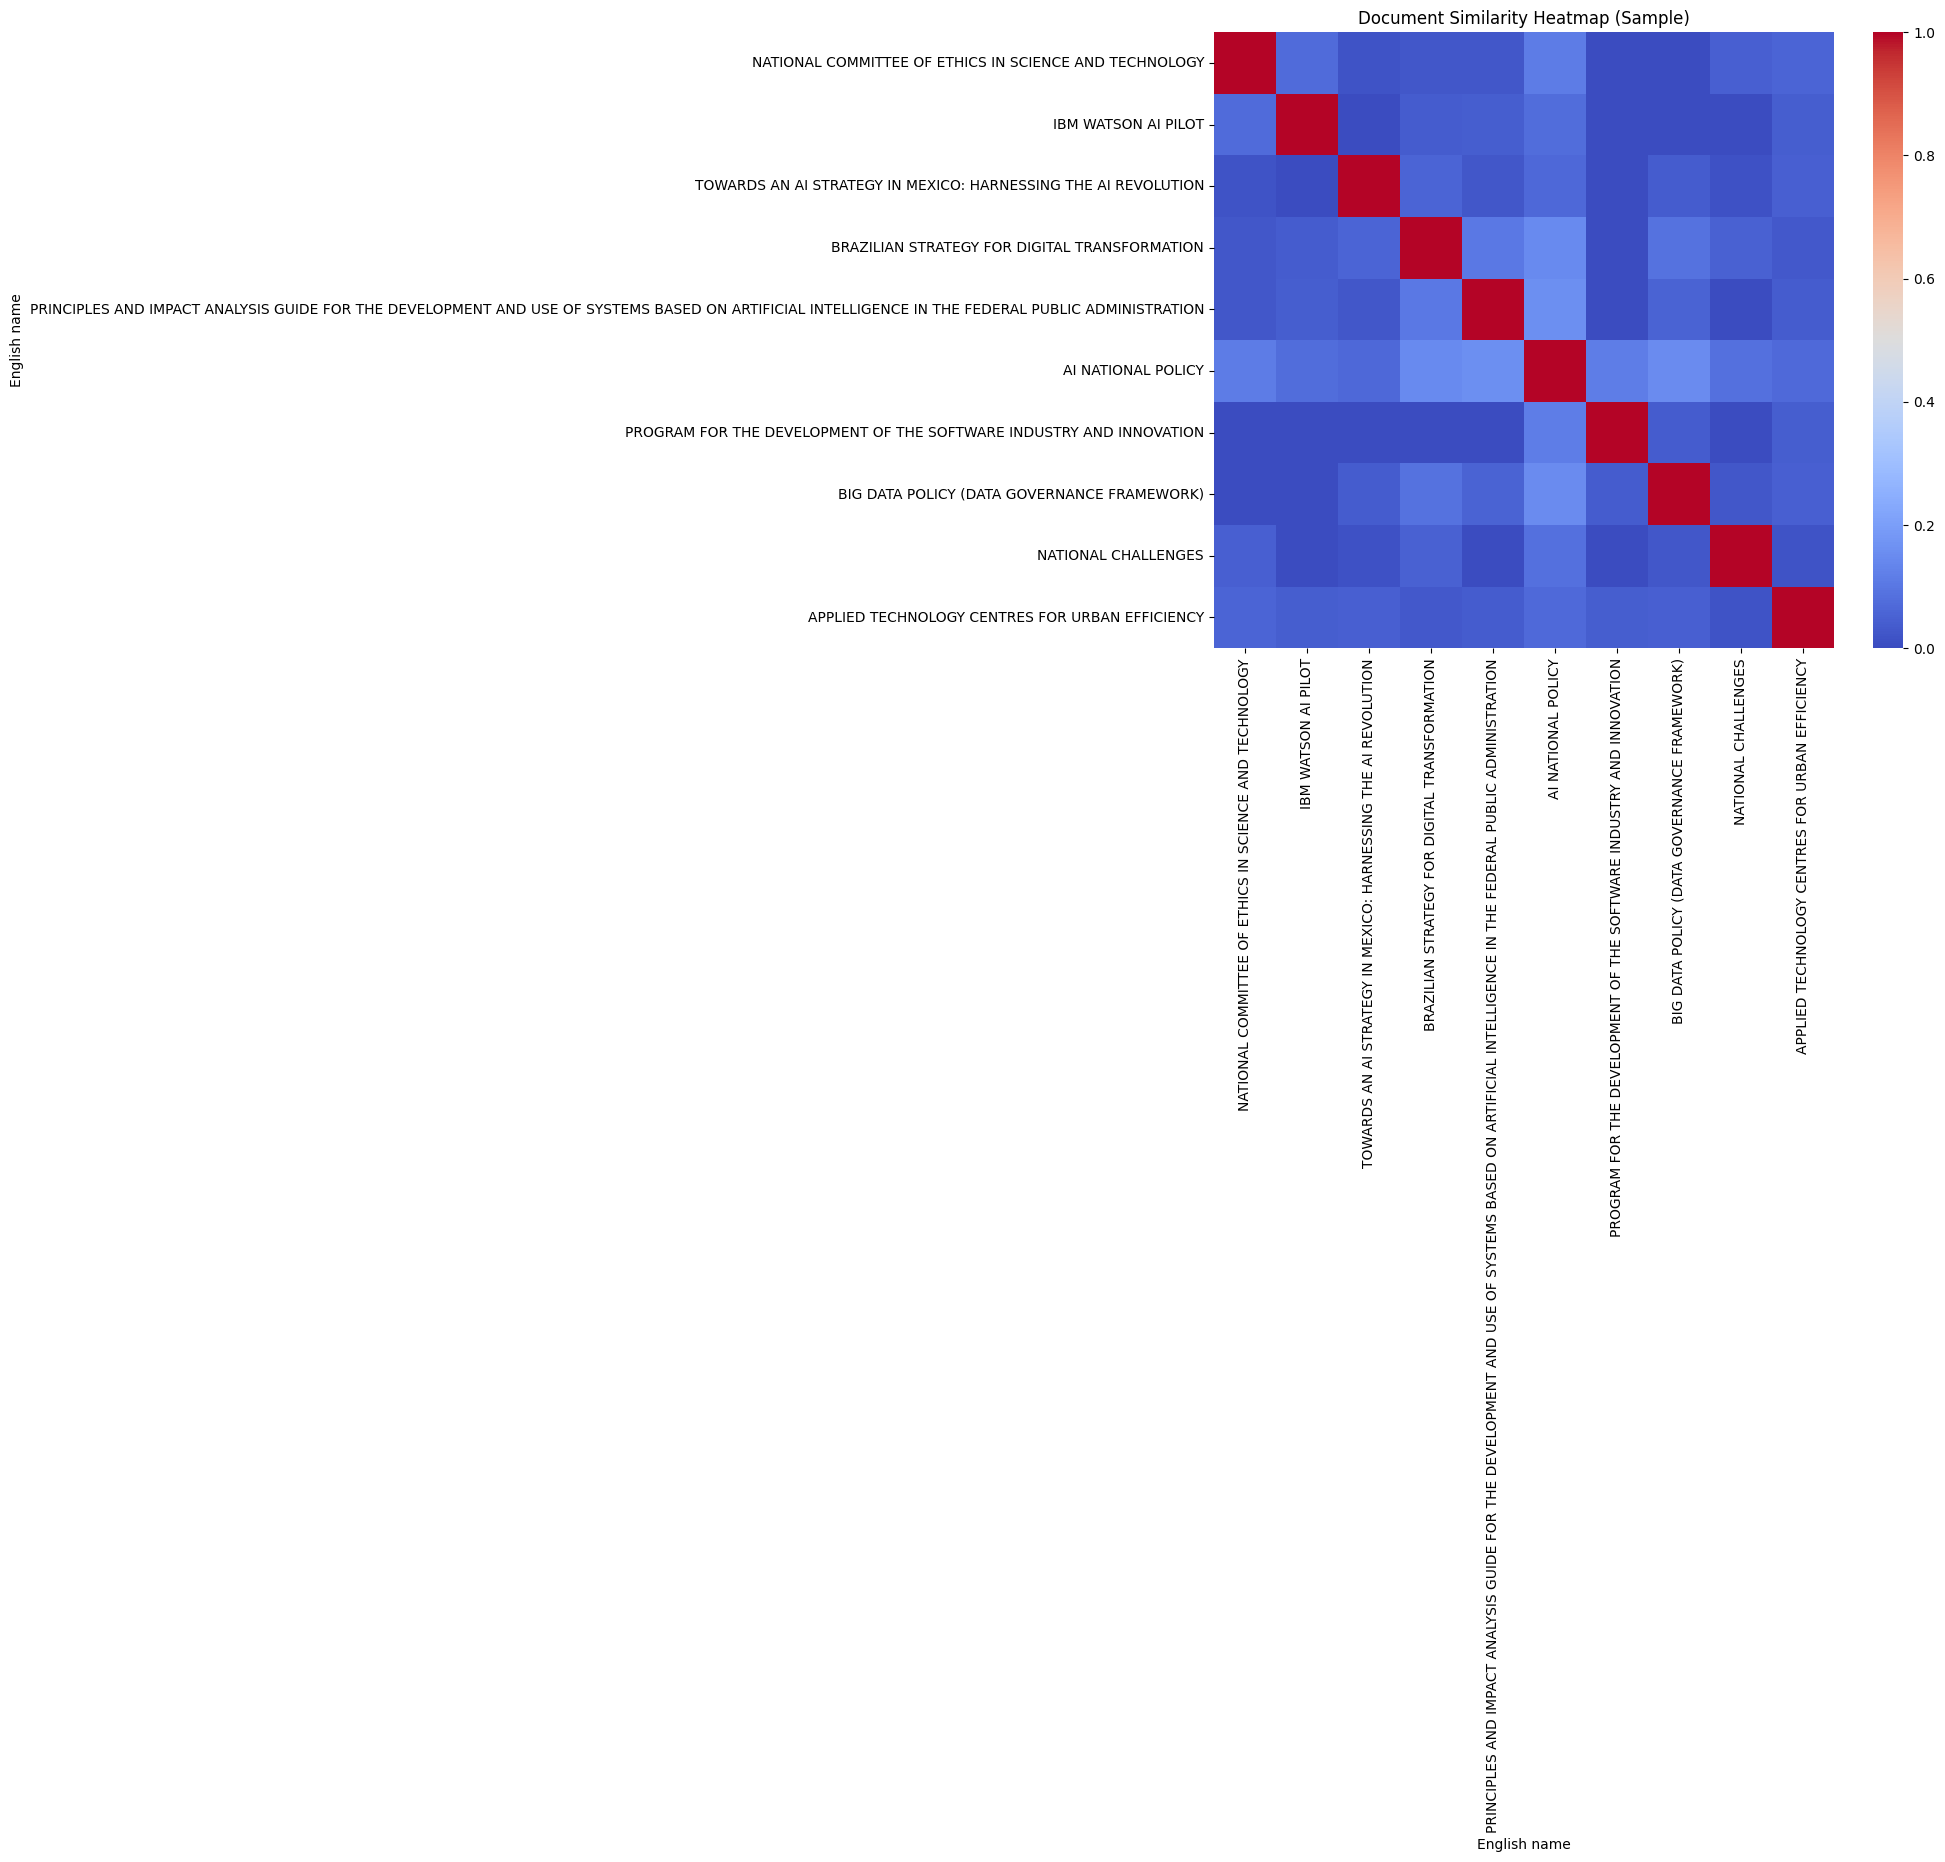

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

def create_heatmap(sim_matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(sim_matrix, annot=False, cmap='coolwarm')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

create_heatmap(cosine_sim_df.iloc[:10, :10], "Document Similarity Heatmap (Sample)")


## Country Similarity Analysis

In [ ]:

country_grouped = dataset.groupby('Country')['Objective(s)'].apply(' '.join)
country_tfidf_matrix = vectorizer.transform(country_grouped)
country_cosine_sim = cosine_similarity(country_tfidf_matrix, country_tfidf_matrix)
country_cosine_sim_df = pd.DataFrame(country_cosine_sim, index=country_grouped.index, columns=country_grouped.index)
country_cosine_sim_df


Country,Argentina,Brazil,Chile,Colombia,Mexico,Peru,Uruguay
Country,,,,,,,
Argentina,1.000000,0.354206,0.308243,0.421133,0.225659,0.273402,0.267015
Brazil,0.354206,1.000000,0.408358,0.435804,0.232476,0.257874,0.225794
Chile,0.308243,0.408358,1.000000,0.406432,0.186582,0.270180,0.250932
Colombia,0.421133,0.435804,0.406432,1.000000,0.350170,0.344797,0.338140
Mexico,0.225659,0.232476,0.186582,0.350170,1.000000,0.214738,0.125374
Peru,0.273402,0.257874,0.270180,0.344797,0.214738,1.000000,0.224073
Uruguay,0.267015,0.225794,0.250932,0.338140,0.125374,0.224073,1.000000


## Country Similarity Visualization

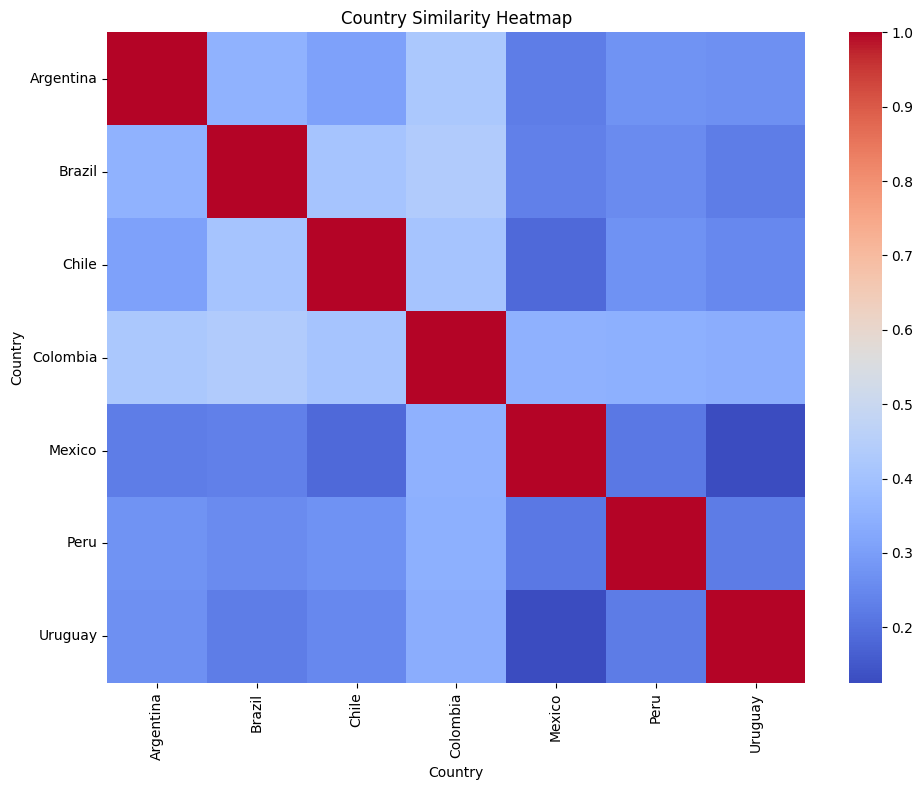

In [ ]:
create_heatmap(country_cosine_sim_df, 'Country Similarity Heatmap')

## Temporal Analysis of Regulations

In [ ]:

dataset['Start date'] = dataset['Start date'].fillna(0).astype(int)
temporal_grouped = dataset.groupby('Start date')['Objective(s)'].apply(' '.join)
temporal_tfidf_matrix = vectorizer.transform(temporal_grouped)
temporal_cosine_sim = cosine_similarity(temporal_tfidf_matrix, temporal_tfidf_matrix)
temporal_cosine_sim_df = pd.DataFrame(temporal_cosine_sim, index=temporal_grouped.index, columns=temporal_grouped.index)
temporal_cosine_sim_df


Start date,0,2001,2013,2015,2018,2019,2020,2021,2022
Start date,,,,,,,,,
0,1.000000,0.084560,0.197775,0.086188,0.203112,0.346306,0.307587,0.297046,0.216529
2001,0.084560,1.000000,0.048561,0.034313,0.183204,0.158779,0.191468,0.172365,0.040790
2013,0.197775,0.048561,1.000000,0.097250,0.186679,0.271545,0.290095,0.218450,0.207300
2015,0.086188,0.034313,0.097250,1.000000,0.138200,0.107674,0.185015,0.112301,0.006546
2018,0.203112,0.183204,0.186679,0.138200,1.000000,0.385633,0.456493,0.361550,0.147484
2019,0.346306,0.158779,0.271545,0.107674,0.385633,1.000000,0.530222,0.429262,0.275249
2020,0.307587,0.191468,0.290095,0.185015,0.456493,0.530222,1.000000,0.509535,0.204646
2021,0.297046,0.172365,0.218450,0.112301,0.361550,0.429262,0.509535,1.000000,0.184526
2022,0.216529,0.040790,0.207300,0.006546,0.147484,0.275249,0.204646,0.184526,1.000000


## Temporal Analysis Visualization

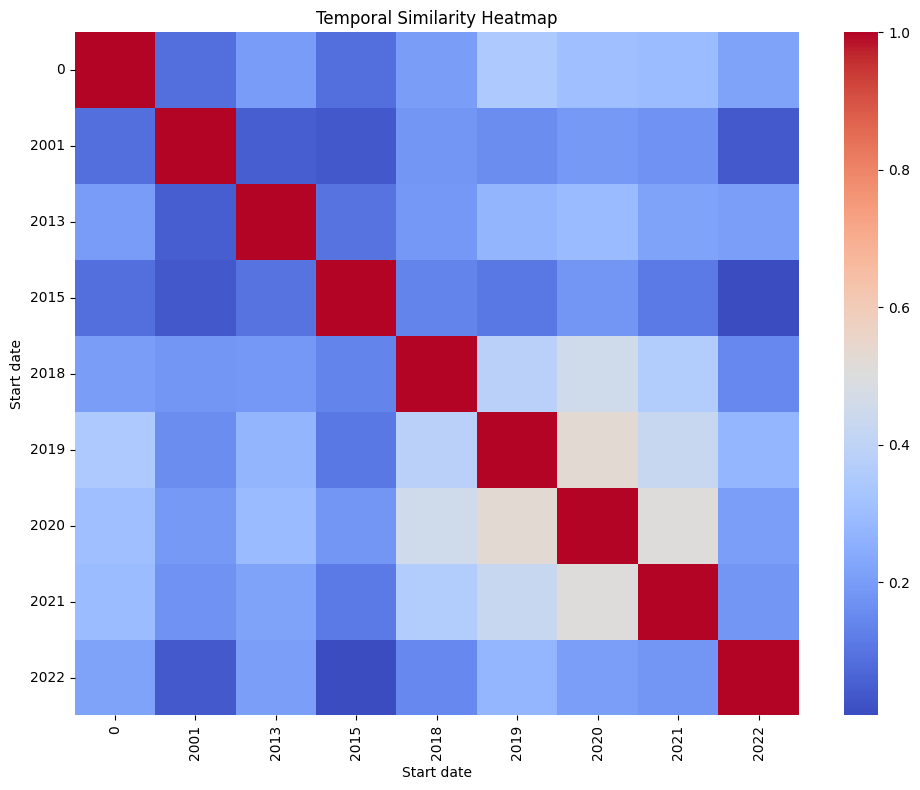

In [ ]:
create_heatmap(temporal_cosine_sim_df, 'Temporal Similarity Heatmap')

##Ethical Mentions in Documents Over Time by Country

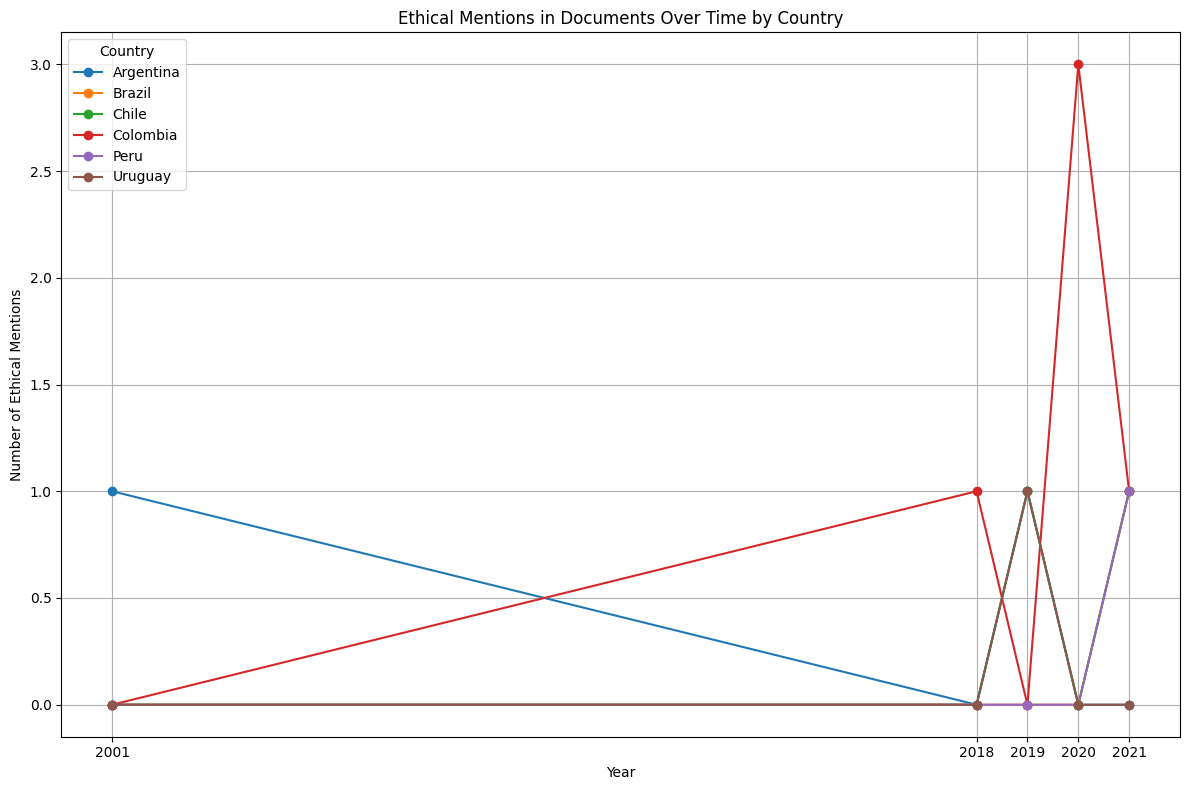

(Colombia     5
 Argentina    2
 Chile        2
 Brazil       1
 Peru         1
 Uruguay      1
 dtype: int64,
            2001  2018  2019  2020  2021
 Argentina     1     0     1     0     0
 Brazil        0     0     0     0     1
 Chile         0     0     1     0     1
 Colombia      0     1     0     3     1
 Peru          0     0     0     0     1
 Uruguay       0     0     1     0     0)

In [ ]:
import matplotlib.pyplot as plt

# Assuming ethical_counts is a pandas DataFrame with countries as the index and years as columns

# Add Brazil and Chile with zero mentions if they're not in the DataFrame
for country in ['Brazil', 'Chile']:
    if country not in ethical_counts.index:
        ethical_counts.loc[country] = 0

# Ensure all columns are integers (representing years)
ethical_counts.columns = ethical_counts.columns.astype(int)

# Sort the index to ensure consistent plotting
ethical_counts = ethical_counts.sort_index()

# Summing across all years to find the most interested country
total_ethical_mentions_by_country = ethical_counts.sum(axis=1).sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
for country in ethical_counts.index:
    # Get the years and mentions for plotting
    years = ethical_counts.columns
    mentions = ethical_counts.loc[country]
    # Plot a line for each country
    plt.plot(years, mentions, marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Number of Ethical Mentions')
plt.title('Ethical Mentions in Documents Over Time by Country')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(years)  # Set the x-ticks to be the years
plt.tight_layout()  # Adjust the layout
plt.show()

total_ethical_mentions_by_country, ethical_counts


# Get data
## Import Dataset

In [ ]:
print("Train Dataset:")
print("============= \n")

# read_csv Read a comma-separated values (csv) file into DataFrame
dataset = pd.read_csv('/content/drive/MyDrive/Fiverr_Projects/maflorbaudino-attachments/prueba.csv', header= 0, encoding= 'unicode_escape')
# CSV file into DataFrame
df=pd.DataFrame(dataset)
# Dataframe is displayed
df.head()

Train Dataset:



,English name,Country,Start date,Objective(s)
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,To execute actions tending to incorporate the ethical dimension in the institutions of science a...
1,IBM WATSON AI PILOT,Argentina,2018.0,To test the AI technology in the Aquaculture sector.
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,"To develop an appropriate governance framework to foster multisectoral dialogue, through the cre..."
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,"On AI specifically, E-Digital includes action to evaluate potential economic and social impact ..."
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,To monitor and evaluate the impacts of AI systems in order to ensure that they achieve the expec...


In [ ]:
# Renaming the columns
df.rename(columns={'Objective(s)': 'Objective'}, inplace=True)
df

,English name,Country,Start date,Objective
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,To execute actions tending to incorporate the ethical dimension in the institutions of science a...
1,IBM WATSON AI PILOT,Argentina,2018.0,To test the AI technology in the Aquaculture sector.
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,"To develop an appropriate governance framework to foster multisectoral dialogue, through the cre..."
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,"On AI specifically, E-Digital includes action to evaluate potential economic and social impact ..."
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,To monitor and evaluate the impacts of AI systems in order to ensure that they achieve the expec...
...,...,...,...,...
75,JAQUE AND SERVICES GUIDE,Brazil,2018.0,To provide faster information to citizens regarding the functioning of public services.
76,NATIONAL AI RESEARCH CENTER,Chile,2021.0,"To act as a foundation for the development of AI in Chile and the world, with a mission to promo..."
77,GOVERNANCE COMMITTEE OF THE BRAZILIAN AI STRATEGY,Brazil,2021.0,1. Collaborate with different bodies and public entities with competences related to the digital...
78,MCTI/EMBRAPII NETWORK OF TECHNOLOGIES AND DIGITAL INNOVATION,Brazil,2022.0,"To leverage the productive capacity and competitiveness of Brazilian companies, encouraging the ..."


# Text Preprocessing

## Tokenize Sentences and Clean

#### Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using gensim’s simple_preprocess(). Setting the deacc=True option removes punctuations.

In [ ]:
def filter_tweets_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet' column
    df['Num_Words'] = df['Objective'].apply(lambda x: len(str(x).split()))

    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = df[df['Num_Words'] >= min_words].copy()

    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])

    return filtered_dataset

df = filter_tweets_by_word_count(df)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
df

Dataset Data:



,English name,Country,Start date,Objective
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,To execute actions tending to incorporate the ethical dimension in the institutions of science a...
1,IBM WATSON AI PILOT,Argentina,2018.0,To test the AI technology in the Aquaculture sector.
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,"To develop an appropriate governance framework to foster multisectoral dialogue, through the cre..."
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,"On AI specifically, E-Digital includes action to evaluate potential economic and social impact ..."
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,To monitor and evaluate the impacts of AI systems in order to ensure that they achieve the expec...
...,...,...,...,...
75,JAQUE AND SERVICES GUIDE,Brazil,2018.0,To provide faster information to citizens regarding the functioning of public services.
76,NATIONAL AI RESEARCH CENTER,Chile,2021.0,"To act as a foundation for the development of AI in Chile and the world, with a mission to promo..."
77,GOVERNANCE COMMITTEE OF THE BRAZILIAN AI STRATEGY,Brazil,2021.0,1. Collaborate with different bodies and public entities with competences related to the digital...
78,MCTI/EMBRAPII NETWORK OF TECHNOLOGIES AND DIGITAL INNOVATION,Brazil,2022.0,"To leverage the productive capacity and competitiveness of Brazilian companies, encouraging the ..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
# Data Preprocessing is a technique that is used to convert the raw data into a clean data set
from gensim.parsing.preprocessing import STOPWORDS


'''
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments :
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()

    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters

    text = re.sub(r'\s+', ' ', text).strip()

    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)

    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text

# Apply the Preprocessing on Input Data Comments of Training Data
df['Objective'] = df['Objective'].apply(data_preprocessing)
# preprocessed_testing_data = testing_data

print("\nData After Pre-processing:")
print("==================================\n")

# first five instances are printed usinf Head
df.head()


Data After Pre-processing:



,English name,Country,Start date,Objective
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,execute actions tending incorporate ethical dimension institutions science technology collaborat...
1,IBM WATSON AI PILOT,Argentina,2018.0,test technology aquaculture sector
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,develop appropriate governance framework foster multisectoral dialogue creation subcommittee art...
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,specifically edigital includes action evaluate potential economic social impact artificial intel...
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,monitor evaluate impacts systems order ensure achieve expected results promote transparency expl...


In [ ]:
df1=df
df1

,English name,Country,Start date,Objective
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,execute actions tending incorporate ethical dimension institutions science technology collaborat...
1,IBM WATSON AI PILOT,Argentina,2018.0,test technology aquaculture sector
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,develop appropriate governance framework foster multisectoral dialogue creation subcommittee art...
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,specifically edigital includes action evaluate potential economic social impact artificial intel...
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,monitor evaluate impacts systems order ensure achieve expected results promote transparency expl...
...,...,...,...,...
75,JAQUE AND SERVICES GUIDE,Brazil,2018.0,provide faster information citizens regarding functioning public services
76,NATIONAL AI RESEARCH CENTER,Chile,2021.0,act foundation development chile world mission promote cuttingedge research technology transfer ...
77,GOVERNANCE COMMITTEE OF THE BRAZILIAN AI STRATEGY,Brazil,2021.0,collaborate different bodies public entities competences related digital theme programs projects...
78,MCTI/EMBRAPII NETWORK OF TECHNOLOGIES AND DIGITAL INNOVATION,Brazil,2022.0,leverage productive capacity competitiveness brazilian companies encouraging use development fro...


In [ ]:
# Resetting the index
df = df.reset_index(drop=True)
df

,English name,Country,Start date,Objective
0,NATIONAL COMMITTEE OF ETHICS IN SCIENCE AND TECHNOLOGY,Argentina,2001.0,execute actions tending incorporate ethical dimension institutions science technology collaborat...
1,IBM WATSON AI PILOT,Argentina,2018.0,test technology aquaculture sector
2,TOWARDS AN AI STRATEGY IN MEXICO: HARNESSING THE AI REVOLUTION,Mexico,2018.0,develop appropriate governance framework foster multisectoral dialogue creation subcommittee art...
3,BRAZILIAN STRATEGY FOR DIGITAL TRANSFORMATION,Brazil,2018.0,specifically edigital includes action evaluate potential economic social impact artificial intel...
4,PRINCIPLES AND IMPACT ANALYSIS GUIDE FOR THE DEVELOPMENT AND USE OF SYSTEMS BASED ON ARTIFICIAL ...,Mexico,2018.0,monitor evaluate impacts systems order ensure achieve expected results promote transparency expl...
...,...,...,...,...
75,JAQUE AND SERVICES GUIDE,Brazil,2018.0,provide faster information citizens regarding functioning public services
76,NATIONAL AI RESEARCH CENTER,Chile,2021.0,act foundation development chile world mission promote cuttingedge research technology transfer ...
77,GOVERNANCE COMMITTEE OF THE BRAZILIAN AI STRATEGY,Brazil,2021.0,collaborate different bodies public entities competences related digital theme programs projects...
78,MCTI/EMBRAPII NETWORK OF TECHNOLOGIES AND DIGITAL INNOVATION,Brazil,2022.0,leverage productive capacity competitiveness brazilian companies encouraging use development fro...


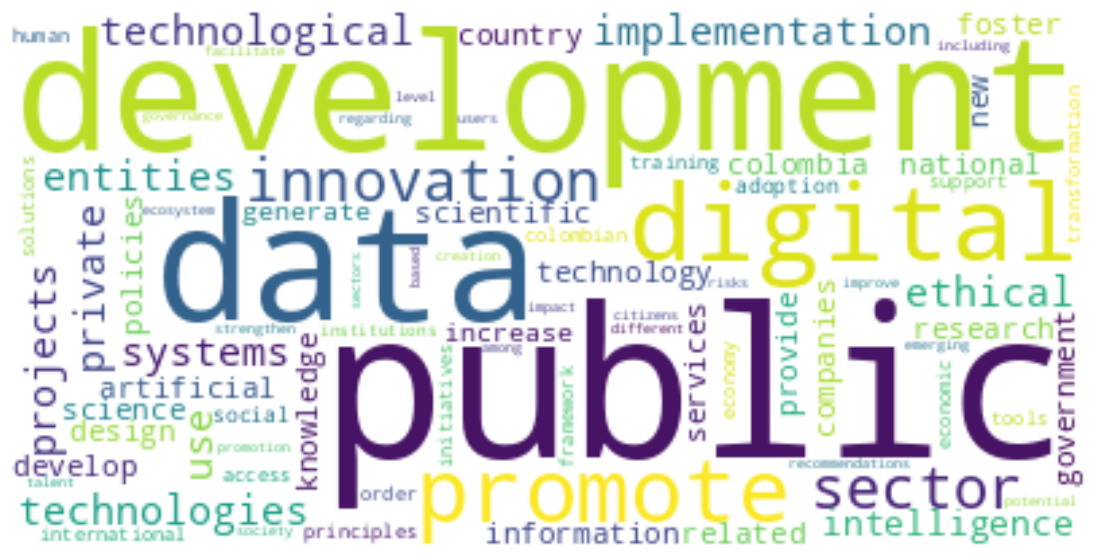

In [ ]:
from wordcloud import WordCloud


# assuming the target class column is called 'Bush'
# bush_speech_df = df['Bush']

# Calculate word frequency, count each word only once
word_freq = df['Objective'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, background_color="white", contour_width=3, contour_color='steelblue').generate_from_frequencies(word_freq)


plt.figure(figsize = (20,7))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True)
        yield(sent)

# Convert to list
data = df.Objective.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])


[['execute', 'actions', 'tending', 'incorporate', 'ethical', 'dimension', 'institutions', 'science', 'technology', 'collaborate', 'science', 'technology', 'institutions', 'universities', 'incorporate', 'ethical', 'principles', 'protocols', 'research', 'projects', 'across', 'disciplines', 'ensure', 'rules', 'related', 'purposes', 'committee', 'govern', 'mercosur', 'support', 'initiatives', 'scientific', 'societies', 'elaboration', 'codes', 'ethics', 'creation', 'coordination', 'local', 'committees', 'ethics', 'institutions', 'contribute', 'university', 'education', 'development', 'ethical', 'training', 'programs', 'students', 'vocation', 'scientific', 'technological', 'research', 'promote', 'training', 'application', 'ethical', 'principles', 'tasks', 'management', 'evaluation', 'national', 'provincial', 'agencies', 'sector']]


## Create document-feature matrix (DFM)
#### Build the Bigram, Trigram Models and Lemmatize

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list of lemmatized tokens
# tokens_lemmatized = [...]

# Join the lemmatized tokens into sentences
documents = [' '.join(tokens) for tokens in data_words]

# Create a DataFrame
df = pd.DataFrame({'text': documents})

# Create a CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the text data
X = vectorizer.fit_transform(df['text'])

# Create a DataFrame from the DTM (Document-Term Matrix)
dfm = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Most frequent terms
top_features = dfm.sum().sort_values(ascending=False)

# Display the top 50 terms
print(top_features.head(50))


public            64
development       60
data              60
digital           45
promote           42
innovation        34
sector            32
use               28
implementation    28
systems           26
private           25
technologies      25
technological     21
ethical           21
entities          20
projects          20
scientific        19
technology        19
intelligence      19
country           18
national          18
develop           18
research          18
knowledge         18
artificial        18
information       18
government        17
policies          16
colombia          16
companies         15
science           15
new               15
related           15
provide           14
adoption          14
foster            14
design            14
generate          14
increase          14
services          14
social            13
principles        12
international     12
economic          12
support           12
economy           12
colombian         11
training     

# Build the Bigram, Trigram Models and Lemmatize

Let’s form the bigram and trigrams using the Phrases model. This is passed to Phraser() for efficiency in speed of execution.

Next, lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs.

We keep only these POS tags because they are the ones contributing the most to the meaning of the sentences. Here, I use spacy for lemmatization.

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

# Model Selection

## Build the Topic Model
### To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. Let’s create them first and then build the model. The trained topics (keywords and weights) are printed below as well.

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

To build the LDA topic model using LdaModel(), you need the corpus and the dictionary. Let’s create them first and then build the model. The trained topics (keywords and weights) are printed below as well.

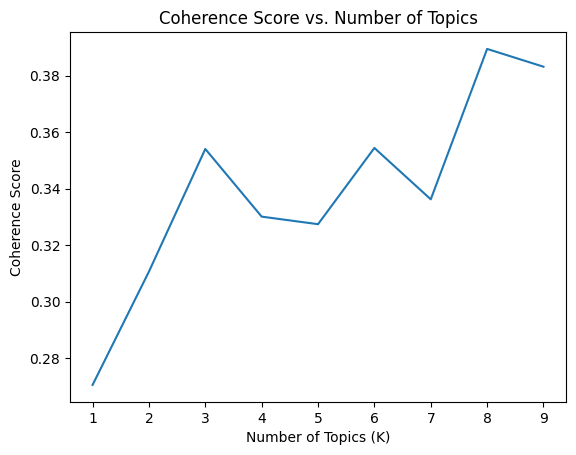

The best number of topics (K) is 8 with a coherence score of 0.38947011761827344
[(0,
  '0.086*"technology" + 0.047*"knowledge" + 0.046*"new" + 0.026*"talent" + '
  '0.025*"emerge" + 0.024*"collaborative" + 0.023*"objective" + '
  '0.020*"generation" + 0.019*"transfer" + 0.018*"access"'),
 (1,
  '0.041*"regard" + 0.023*"colombian" + 0.020*"different" + 0.019*"ecosystem" '
  '+ 0.017*"job" + 0.017*"productive" + 0.015*"facilitate" + '
  '0.014*"collaboration" + 0.014*"people" + 0.014*"strengthen"'),
 (2,
  '0.043*"process" + 0.036*"design" + 0.036*"system" + 0.036*"user" + '
  '0.035*"allow" + 0.029*"benefit" + 0.019*"monitor" + 0.018*"decision" + '
  '0.018*"well" + 0.017*"datum"'),
 (3,
  '0.078*"digital" + 0.047*"datum" + 0.043*"entity" + 0.032*"public" + '
  '0.031*"country" + 0.024*"policy" + 0.023*"generate" + '
  '0.019*"transformation" + 0.016*"increase" + 0.016*"security"'),
 (4,
  '0.040*"national" + 0.030*"promote" + 0.030*"scientific" + '
  '0.027*"initiative" + 0.025*"ethic

In [ ]:
import gensim
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Define a range of values for K (number of topics)
k_values = range(1, 10)  # Try values from 1 to 10

# Initialize a list to store coherence scores for each K
coherence_scores = []

# Iterate over different values of K
for k in k_values:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=id2word,
                                                num_topics=k,  # Set the number of topics to k
                                                random_state=100,
                                                update_every=1,
                                                chunksize=10,
                                                passes=10,
                                                alpha='symmetric',
                                                iterations=100,
                                                per_word_topics=True)

    # Calculate coherence score for the LDA model
    coherence_model = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Append the coherence score to the list
    coherence_scores.append(coherence_score)

# Plot the coherence scores to find the best value of K
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.xticks(k_values)
plt.show()

# Find the best value of K with the highest coherence score
best_k = k_values[coherence_scores.index(max(coherence_scores))]
print(f"The best number of topics (K) is {best_k} with a coherence score of {max(coherence_scores)}")

# Build the final LDA model with the best K
final_lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                   id2word=id2word,
                                                   num_topics=best_k,
                                                   random_state=100,
                                                   update_every=1,
                                                   chunksize=10,
                                                   passes=10,
                                                   alpha='symmetric',
                                                   iterations=100,
                                                   per_word_topics=True)
pprint(final_lda_model.print_topics())

## Metrics

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', final_lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# # Compute Coherence Score
coherence_model_lda = CoherenceModel(model=final_lda_model, texts=data_ready, dictionary=id2word, coherence='c_v') # CoherenceModel used for evaluation of topic models.
coherence_lda = coherence_model_lda.get_coherence() # Get coherence value based on pipeline parameters.
print('\nCoherence Score: ', coherence_lda) # Print the Coherence Score


Perplexity:  -6.961198351023506

Coherence Score:  0.38947011761827344


# What is the Dominant topic and its percentage contribution in each document

In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

This way, you will know which document belongs predominantly to which topic.



In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row_list in enumerate(final_lda_model[corpus]):
        row = row_list[0] if final_lda_model.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = final_lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=final_lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4,0.9863,"national, promote, scientific, initiative, ethical, academic, science, training, principle, local","[execute, action, tend, incorporate, ethical, dimension, institution, science, technology, colla..."
1,1,7,0.6248,"information, provide, company, service, promotion, body, solution, level, support, environment","[test, technology, aquaculture, sector]"
2,2,6,0.9776,"public, sector, development, use, promote, implementation, innovation, private, government, project","[develop, appropriate, governance, framework, multisectoral, creation, subcommittee, commission,..."
3,3,6,0.9708,"public, sector, development, use, promote, implementation, innovation, private, government, project","[specifically, edigital, include, action, evaluate, potential, economic, social, impact, big, da..."
4,4,2,0.8310,"process, design, system, user, allow, benefit, monitor, decision, well, datum","[monitor, evaluate, impact, system, order, ensure, achieve, expect, result, promote, transparenc..."
...,...,...,...,...,...
75,75,7,0.5471,"information, provide, company, service, promotion, body, solution, level, support, environment","[provide, fast, information, citizen, regard, function, public, service]"
76,76,4,0.5681,"national, promote, scientific, initiative, ethical, academic, science, training, principle, local","[promote, cuttingedge, research, technology, transfer, collaboration, exchange, idea, promotion,..."
77,77,4,0.4478,"national, promote, scientific, initiative, ethical, academic, science, training, principle, local","[collaborate, different, body, public, entity, competence, relate, digital, theme, program, proj..."
78,78,7,0.3616,"information, provide, company, service, promotion, body, solution, level, support, environment","[leverage, productive, capacity, competitiveness, brazilian, company, encourage, use, developmen..."


# The most representative sentence for each topic

Sometimes you want to get samples of sentences that most represent a given topic. This code gets the most exemplar sentence for each topic.

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet,
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)],
                                            axis=0)

# Reset Index
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9204,"technology, knowledge, new, talent, emerge, collaborative, objective, generation, transfer, access","[encourage, adoption, new, technology, generation, specialization, human, talent, transfer, know..."
1,1,0.7020,"regard, colombian, different, ecosystem, job, productive, facilitate, collaboration, people, str...","[unify, different, statute, currently, govern, personal, datum, offline, replace, certain, regul..."
2,2,0.8310,"process, design, system, user, allow, benefit, monitor, decision, well, datum","[monitor, evaluate, impact, system, order, ensure, achieve, expect, result, promote, transparenc..."
3,3,0.9743,"digital, datum, entity, public, country, policy, generate, transformation, increase, security","[massify, availability, datum, public, entity, accessible, usable, quality, digital, generate, l..."
4,4,0.9863,"national, promote, scientific, initiative, ethical, academic, science, training, principle, local","[execute, action, tend, incorporate, ethical, dimension, institution, science, technology, colla..."
5,5,0.7431,"space, instrument, plan, platform, change, challenge, store, relevant, processing, actor","[challenge, age, population, technological, revolution, climate, change, agenda, concrete, relev..."
6,6,0.9854,"public, sector, development, use, promote, implementation, innovation, private, government, project","[citizen, development, application, tool, encourage, participation, debate, legal, ethical, soci..."
7,7,0.9775,"information, provide, company, service, promotion, body, solution, level, support, environment","[identify, demonstrate, technological, application, urban, area, brazilian, municipal, administr..."


# Frequency Distribution of Word Counts in Documents

When working with a large number of documents, you want to know how big the documents are as a whole and by topic. Let’s plot the document word counts distribution.

# Word Clouds of Top N Keywords in Each Topic

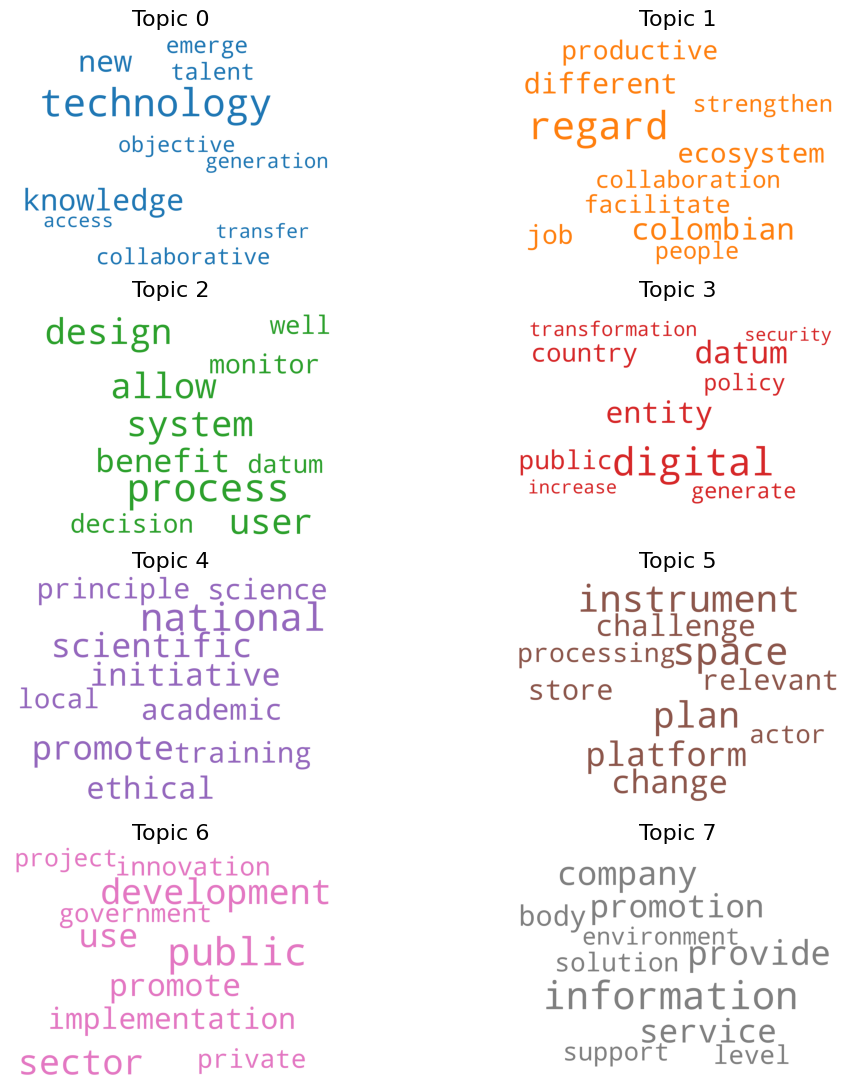

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = final_lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(12,11), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Word Counts of Topic Keywords

When it comes to the keywords in the topics, the importance (weights) of the keywords matters. Along with that, how frequently the words have appeared in the documents is also interesting to look.

Let’s plot the word counts and the weights of each keyword in the same chart.

You want to keep an eye out on the words that occur in multiple topics and the ones whose relative frequency is more than the weight. Often such words turn out to be less important. The chart I’ve drawn below is a result of adding several such words to the stop words list in the beginning and re-running the training process.

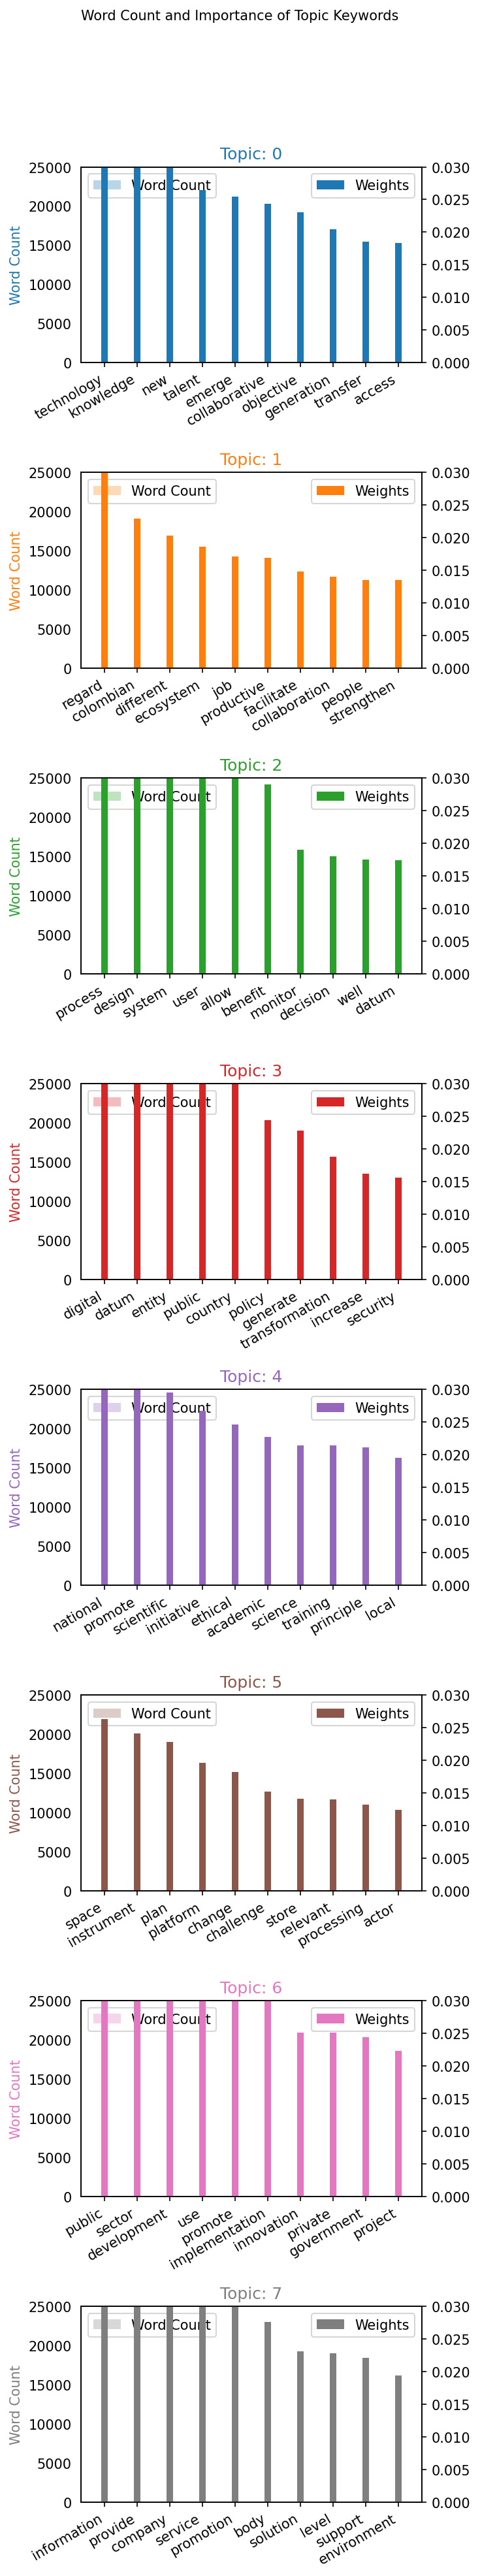

In [ ]:
from collections import Counter
topics = final_lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(8, 1, figsize=(5,25), sharey=True, dpi=150)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 25000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=12)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=10, y=1.05)
plt.show()

# Topic Analyses

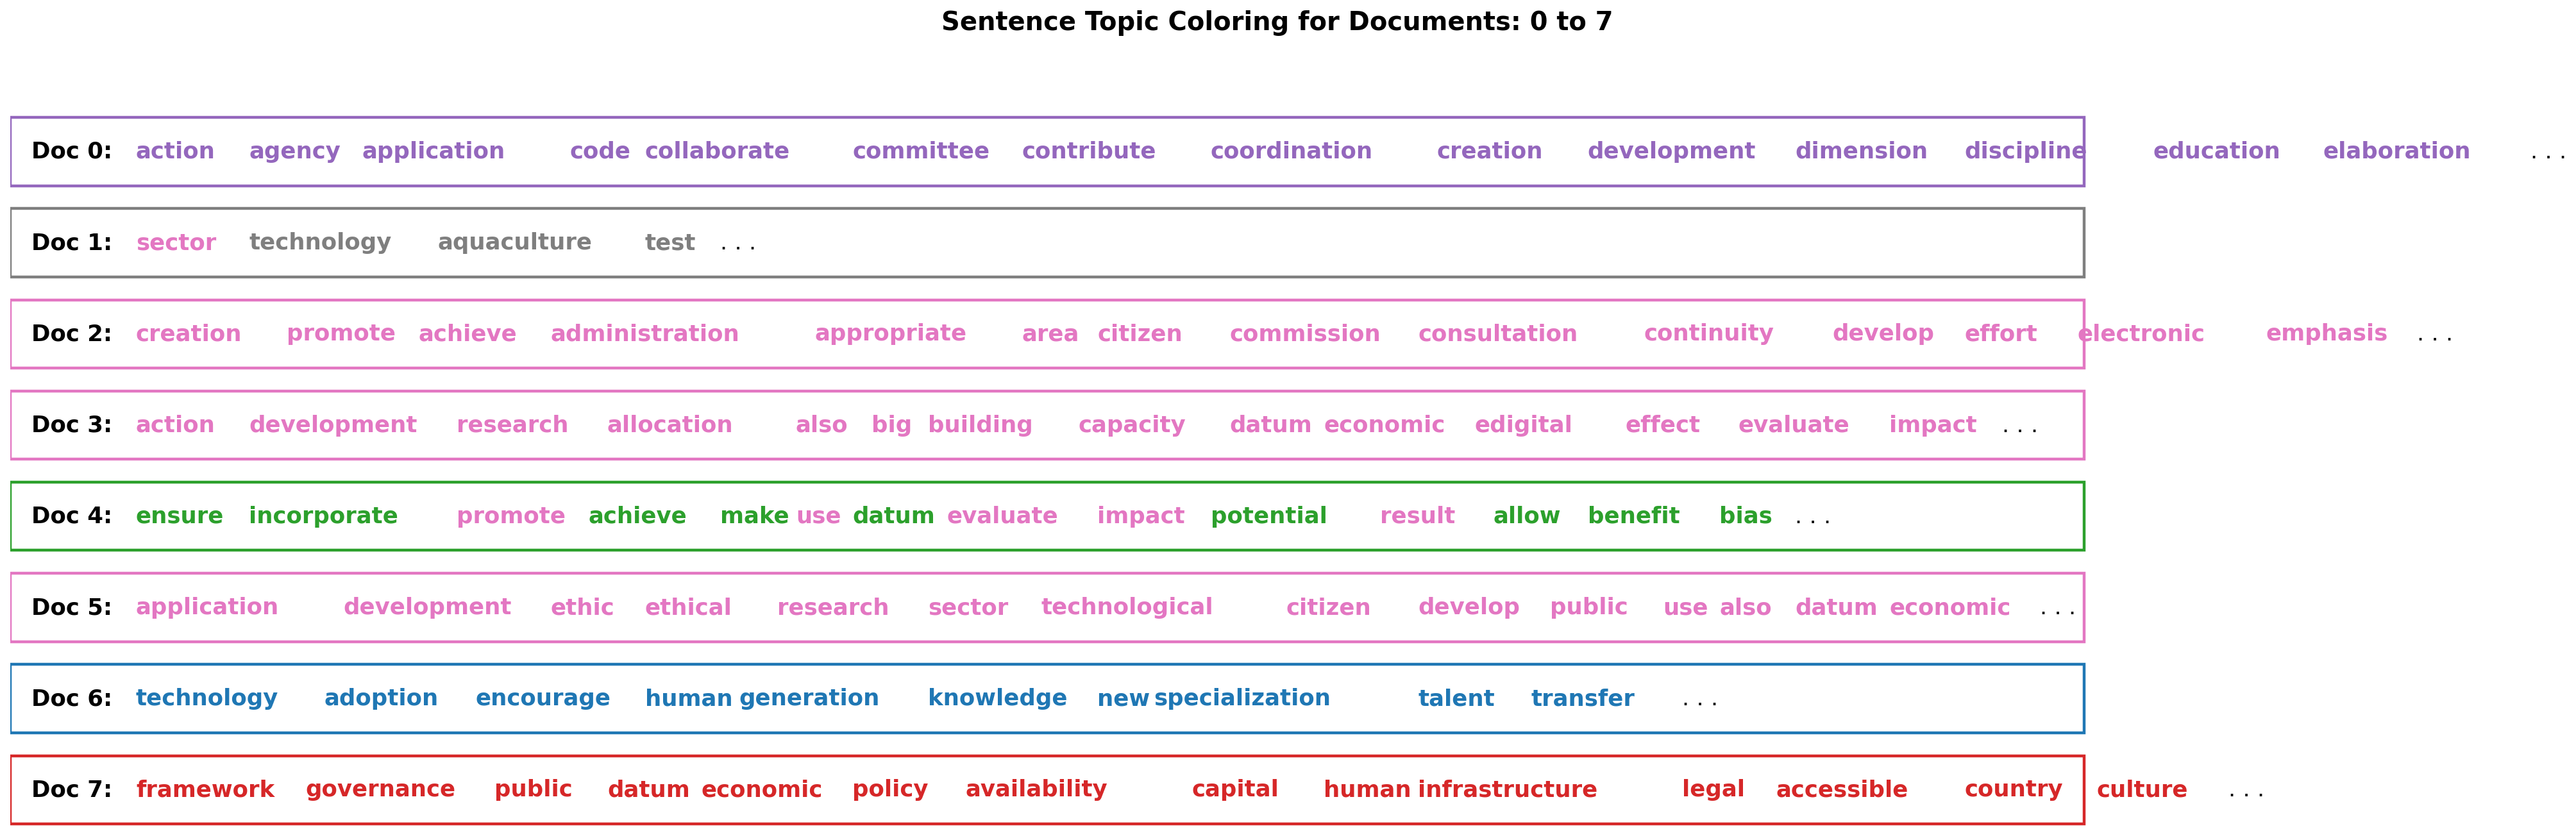

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=final_lda_model, corpus=corpus, start = 0, end = 9):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(25, (end-start)*0.95), dpi=160)
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1]
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(final_lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1,
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=18, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()

# What are the most discussed topics in the documents?

In [ ]:
def topics_per_document(model, corpus, start=0, end=None):
    corpus_sel = corpus[start:end] if end is not None else corpus[start:]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=final_lda_model, corpus=corpus, end=None)

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in final_lda_model.show_topics(formatted=False)
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [ ]:
df_top3words

,topic_id,words
0,0,"technology, \nknowledge, \nnew"
1,1,"regard, \ncolombian, \ndifferent"
2,2,"process, \ndesign, \nsystem"
3,3,"digital, \ndatum, \nentity"
4,4,"national, \npromote, \nscientific"
5,5,"space, \ninstrument, \nplan"
6,6,"public, \nsector, \ndevelopment"
7,7,"information, \nprovide, \ncompany"


In [ ]:
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
dominant_topic_in_each_doc

Dominant_Topic
0     7
1     9
2     4
3    15
4     6
5     9
6    23
7     7
dtype: int64

### The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
### The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

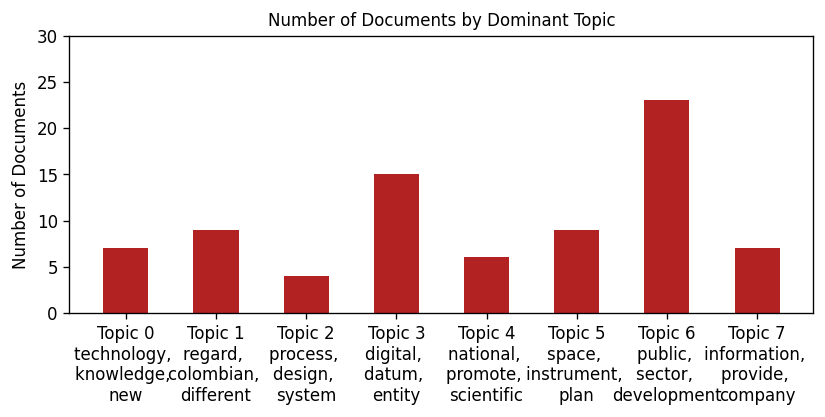

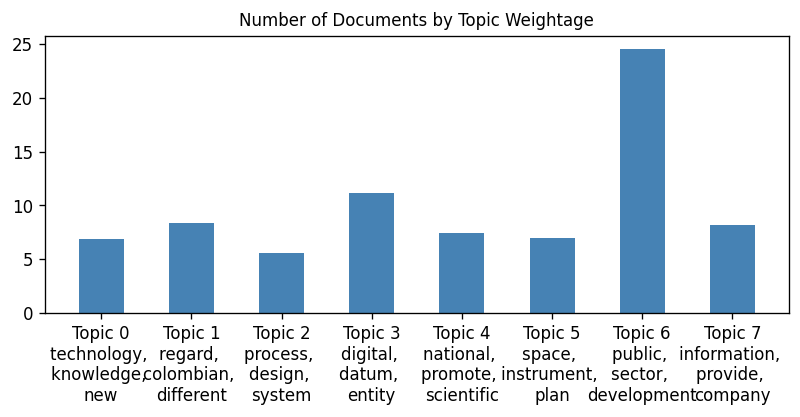

In [ ]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Plot
fig, ax1 = plt.subplots(figsize=(8, 3), dpi=120)
fig, ax2 = plt.subplots(figsize=(8, 3), dpi=120)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 30)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()



Number of documents in each Topic:

6    23
3    15
5     9
1     9
7     7
0     7
4     6
2     4
Name: Dominant_Topic, dtype: int64


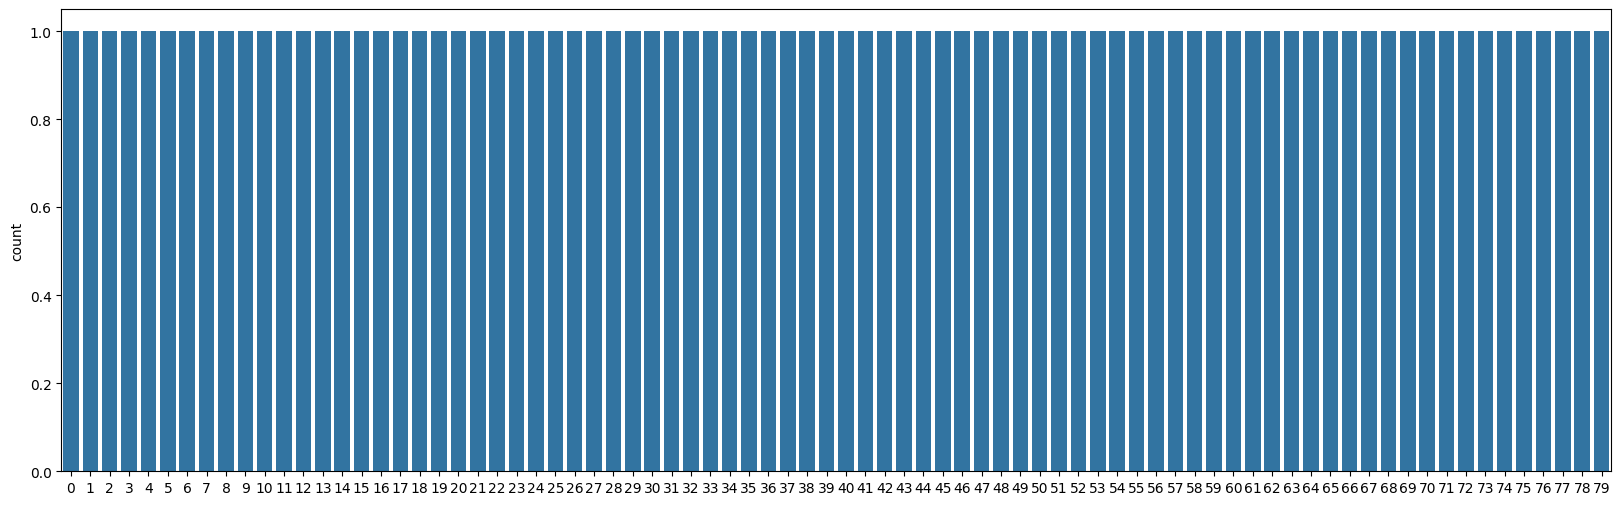

In [ ]:
import seaborn as sns
print("\nNumber of documents in each Topic:")
print("======================================================\n")
class_counts = df_dominant_topic['Dominant_Topic'].value_counts()
print(class_counts)

# Set the figure size
plt.figure(figsize=(20, 6))

sns.countplot(df_dominant_topic["Dominant_Topic"])

# Display the plot
plt.show()

# pyLDAVis

### Finally, pyLDAVis is the most commonly used and a nice way to visualise the information contained in a topic model. Below is the implementation for LdaModel().

In [ ]:
pip install pyLDAvis

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
bigframes 0.19.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.
topic-wizard 0.5.0 requires pandas<2.0.0,>=1.5.2, but you have pandas 2.1.4 which is incompatible.


In [ ]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(final_lda_model, corpus, dictionary=final_lda_model.id2word, n_jobs=1)

vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.291998 -0.031277       1        1  27.673368
3      0.055946  0.283029       2        1  16.195603
1     -0.158540  0.036798       3        1  11.816935
4      0.065900 -0.152494       4        1  10.770414
7     -0.043603 -0.078131       5        1  10.139449
2     -0.035127  0.010050       6        1   8.180997
5     -0.080316 -0.026020       7        1   8.060954
0     -0.096258 -0.041954       8        1   7.162280, topic_info=           Term       Freq      Total Category  logprob  loglift
179     digital  39.000000  39.000000  Default  30.0000  30.0000
44   technology  26.000000  26.000000  Default  29.0000  29.0000
77       public  66.000000  66.000000  Default  28.0000  28.0000
38       sector  43.000000  43.000000  Default  27.0000  27.0000
29      promote  42.000000  42.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
314      access   4.070388   8.774455   Topic8  -3.9997   1.8682
755      update   2.396387   5.071897   Topic8  -4.5295   1.8866
757   community   1.762494   5.198674   Topic8  -4.8367   1.5547
152   encourage   2.031830   8.893862   Topic8  -4.6945   1.1599
156       human   1.478902   5.822229   Topic8  -5.0122   1.2660

[321 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
438       4  0.962903    academic
345       3  0.836621  accelerate
314       3  0.455869      access
314       8  0.455869      access
676       6  0.625378      accord
...     ...       ...         ...
83        1  0.941705         use
83        6  0.052317         use
138       6  0.924710        user
191       2  0.960222       value
140       6  0.774610        well

[327 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 4, 2, 5, 8, 3, 6, 1])